# The Heapsort

In [1]:
# Imports
import random as rand
import networkx as nx
import matplotlib.pyplot as plt
import math
import copy

## Definition of a rooted binary tree
To define a rooted binary tree, it is important to understand what a tree is, so we will begin with defining a tree as regards graph theory:

A tree is an undirected graph in which there is always one path between any of its points:

<B>Undirected:</B> In this context, undirected means that each connection between vertices is bidirectional (i.e. if p<sup>1</sup> is connected to p<sup>2</sup> then p<sup>2</sup> is also connected to p<sup>1</sup>)

<B>Path:</B> A path is the sequence of connections between vertices, in the case of a tree, there must be one and only valid path between vertices on a graph. (E.g. Graph 1 below is a valid example of a tree, as there is only one possible path between any of the vertices. Graph 2 is not as each of the vertices have multiple paths to one another)

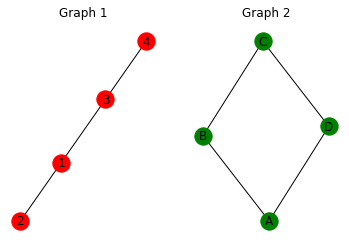

In [2]:
# Graphs to be used as visual aid for definition of paths
example1 = nx.Graph()
example1Connections = [('1', '2'), ('1', '3'), ('3', '4')]
example1.add_edges_from(example1Connections)

example2 = nx.Graph()
example2Connections = [('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'D')]
example2.add_edges_from(example2Connections)

plt.subplot(121)
plt.title('Graph 1')
nx.draw(example1, with_labels=True, node_color="red")

plt.subplot(122)
plt.title("Graph 2")
nx.draw(example2, with_labels=True, node_color="green")

plt.show()

### Now that the tree has been defined, it is time to define what a rooted tree means in this context: 

<b>Rooted Tree:</b> A rooted tree is a tree in which there is a particular vertex, typically called a root, which is used to define the position of the other vertices in the tree.

In rooted trees, the typically way of defining Vertices is that of parent vertices and child vertices:

<B>Parent Vertices:</B> A parent vertices is a vertices with associated child vertices, the amount of children a parent may possess is dependent upon the type of tree. It is worth noting that the root of a tree is the only vertex with no associated parent vertex.

<B>Child Vertices:</B> A child vertex is attached to and defined by it's parent vertex, while parental vertices may have many children dependent on the tree type, a child vertex may only ever have one parental vertex.

<B>Depth:</B> The depth of a rooted tree is the longest path between the root vertex and a child vertex, in furthering the parent-child metaphor, it could be thought of as the number of generations.


### Now that both the tree and the rooted tree have been defined, it is time to explain what the binary refers to in binary rooted tree:

<B>Binary Rooted Tree:</B> A binary rooted tree is a rooted tree in which every parental vertex can have a maximum of two children, for convenience these children are typically referred to as the left child and right child.

Graph 3 and 4 below are examples of binary rooted trees

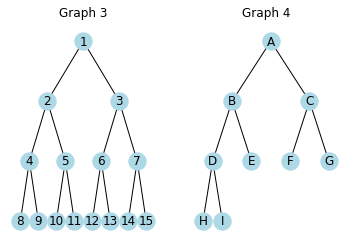

In [3]:
# Example lists to be converted to graphs for testing and illustration purposes
example3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
example4 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']


# A recursive function is used to decide the coordinates of all the nodes, it is a potentially cumbersome method
# But it gets aesthetically pleasing results

# The arguments passed in are the listLen (to represent the length of the list being displayed),
# the coOrdsList so that the function can easily append it's results,
# the i value, so the function understands which vertex it represents, and which vertices are attached
# The xPos so it knows the where it's vertex should be on the x axis,
# The xOffset so it knows how much it needs to shift its children to its left and right
# The treeDepth so it knows the depth of the tree, to adjust the vertical distance between each row
def calc_position(listLen, coOrdsList, i, xPos, xOffset, treeDepth):
    
    # As described below, the position of a child of a vertex can be calculated using the position of the parent * 2,
    # And + 1 for the left child, or + 2 for the right child
    leftChild = 2 * i + 1
    rightChild = 2 * i + 2
    
    x = xPos
    # The y axis value for the vertex is determined by taking the floor value of logarithm to the base 2 of the vertexs index + 1
    # This is the same way the number of digits to repesnt a number in binary is calculated
    # The value is then divided by the calculated dept of the tree, to ensure the vertexes are split out evenly on the y axis,
    # The obtained value is taken away from 1 as it is preferable to have the tree widen towards the bottom instead of the top
    y = 1 - (math.floor(math.log2(i + 1)) / treeDepth)
    
    # The i value representing the location of the point in the list, and its x and y coordinates are converted to a tuple,
    # This tuple is then appended to the passed in coOrdsList
    coOrd = (i, x, y)
    coOrdsList.append(coOrd)
    
    # A test is done to ensure the leftChild is present within the list, if so the algorithm is called recursively
    if leftChild < listLen:
        # The differences from the call in the calc_positions function are two fold, 
        # The xOffset is taken away from the xPos, and the newly obtained value is passed in as the new xPos, to shift the child to the left
        # The Offset value is halved as on a binary tree representation, the gaps between the vertices get narrower down the tree
        calc_position(listLen, coOrdsList, leftChild, xPos - xOffset, xOffset / 2, treeDepth)
        
    # A test as before is performed to ensure the right child is within the list 
    if rightChild < listLen:
        # The only difference between this function called and its left sibling is that the xPos and xOffset are added,
        # As we ofcourse want the right child to shift towards the right
        calc_position(listLen, coOrdsList, rightChild, xPos + xOffset, xOffset / 2, treeDepth)
    

def calc_positions(listToDraw):
    # This is used to calculate the depth of the array, the depth of a
    treeDepth = math.floor(math.log2(len(listToDraw)))
    coOrdsList = []
    
    calc_position(len(listToDraw), coOrdsList, 0, 0, 1, treeDepth)
    
    coOrdsList = sorted(coOrdsList)
    
    for i in range(len(coOrdsList)):
        coOrdsList[i] = coOrdsList[i][1:]
    
    # nx.draw takes its pos arguments in the form of dictionaries containing with the vertex lable being the, and the (x, y)
    # being the stored values, hence, the results are returned in a dictionary format
    return dict(zip(listToDraw, coOrdsList))


# This function is based off of a function written by ATU Lecturer: Ian Mcloughlin from this repository: https://github.com/ianmcloughlin/heapsort/blob/main/heapsort.ipynb
# At In [61], with changes made to account for difficulties with the pydot package
def draw_tree(listToDraw):
    # Creates a balanced tree to represent the list passed in, note that the tree is blank
    treeToDraw = nx.balanced_tree(2, math.floor(math.log2(len(listToDraw))))
    
    #This removes trims all excess vertices from the tree, ensuring the number matches the length of the passed in list
    treeToDraw.remove_nodes_from(list(treeToDraw.nodes)[len(listToDraw):])
    
    # The vertices on the tree generated at the start of the function are replaced with those contained in the list passed in
    treeToDraw = nx.relabel_nodes(treeToDraw, dict(zip(treeToDraw.nodes, listToDraw)), copy = True)
    
    
    # Due to issues with pydot, this line will be commented out for now
    # If possible this will be rectified, as the graphs are quite difficult to analyze when layed out randomly
    #positions = nx.drawing.nx_pydot.graphviz_layout(treeToDraw, prog="dot")
    
    # Due to the aforementioned difficulties with pydot, I made my own function for calculating the coordinates of the points for a binary tree
    # It takes the listToDraw as it's sole argument
    pos = calc_positions(listToDraw)
    
    # Having successfully created and populated the tree, it is drawn
    nx.draw(treeToDraw, pos, with_labels=True, node_color='lightblue')
    
# After testing one large flaw has been observed in this function, due to the usage of dictionaries for recording of points positions,
# If any points have a matching key, they will be forced into the same position on the graph, As of right now I am unsure how to solve this

plt.subplot(121)
draw_tree(example3)
plt.title("Graph 3")

plt.subplot(122)
draw_tree(example4)
plt.title("Graph 4")

plt.show()

## The algorithm behind the Heapsort
The Heapsort utilises a data structure called a binary heap, this could be described as a rooted binary tree, with the constraint that if it a max heap, a parent vertex must be larger than either of it's children, and if it is a min heap, a vertex must be smaller than either of it's children, should this not be the case, the parent and child will swap to satisfy this condition.

The heapsort relies on the fact that arrays and lists can easily be used to represent a binary rooted tree, as shown by the list example5 below, represented in both standard list form and binary rooted tree form, along with a second tree, to demonstrate how the index values of a list correspond to a binary rooted tree

In [4]:
example5 = [13, 14, 15, 5, 3, 6, 2]
example6 = [0, 1, 2, 3, 4, 5, 6]

In [5]:
example5

[13, 14, 15, 5, 3, 6, 2]

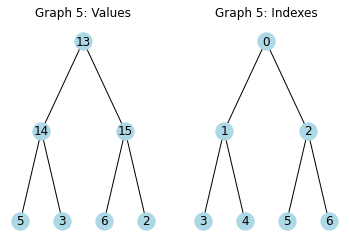

In [6]:
plt.subplot(121)
draw_tree(example5)
plt.title("Graph 5: Values")

plt.subplot(122)
draw_tree(example6)
plt.title("Graph 5: Indexes")

plt.show()

As the graphs above have demonstrated it is rather simple to utilize a list as a tree, to properly understand the relation we can say that if a vertex is located at index I, it's children are located at index I * 2 + 1 and I * 2 + 2, as shown above with vertex 2s children being (2 * 2 + 1) = 5 and (2 * 2 + 2) = 6

Now that we know we can represent a binary tree, the next step is using the binary tree to create a max-heap.
To do this 2 seperate functions are required:
first is the heapify, this function creates a miniature max-heap using the root vertex at i and any of it's immediate children

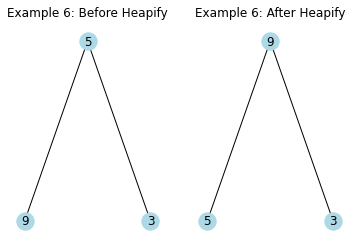

In [7]:
# Implementation of heapify
def example_heapify(inputList, heapElements, i):
    
    # A sub tree is created, with the i value representing the root and parent, left representing the potential left child,
    # And right representing the potential right child
    root = i
    left = 2 * i + 1
    right = 2 * i + 2
    
    # If left is less than the number of heap elements this means we can be confident that it is a valid vertex that is on the tree,
    # Having satisfied that criteria, we compare the value stored at the root of the tree to the value stored in the left child,
    # If it is found that the left child is larger than the root, we replace the root with the left child
    if left < heapElements and inputList[root] < inputList[left]:
        root = left
    
    # The logic here is the same as the previous code block, just regarding the right child
    if right < heapElements and inputList[root] < inputList[right]:
        root = right
    
    # If root does not equal i, that means one or both of the children contained a greater value than i,
    # Hence the values contained at i and the new root are swapped
    if root != i:
        inputList[i], inputList[root] = inputList[root], inputList[i]
        # Heapify is then called again to check if the new sub tree is a valid max heap, and this will happen until it satisfies the criteria
        example_heapify(inputList, heapElements, root)
        
# Now to show an example with a list of size 3
example6 = [5, 9, 3]

plt.subplot(121)
draw_tree(example6)
plt.title("Example 6: Before Heapify")

# Copying the list to process with Heapify
example6sorted = example6.copy()

example_heapify(example6sorted, len(example6sorted), 0)

plt.subplot(122)
draw_tree(example6sorted)
plt.title("Example 6: After Heapify")

plt.show()

Now that we know we can create a sub tree max heap, the next issue to deal with is that of being able to convert a list of size n into a max heap.
So the next function we shall write is one to create a max heap from a list.

In [8]:
# Implentation of build_heap
def example_build_heap(inputList):
    length = len(inputList)
    
    # The build_heap function iterates from the middle of the list back to the front, 
    # It starts at length // 2 - 1, because when i is at length // 2 - 1, the right child of i is the last element in the list
    for i in range(length // 2 - 1, - 1, -1):
        example_heapify(inputList, length, i)
        
example7 = []

# This is something I am sorry to say I must due to an error in my code for drawing trees, if there are any duplicates in a list,
# Unintend behaviour will arise from the tree drawing function, and this has little bearing on the function of the Heapsort
duplicates = True
while duplicates == True:
    example7.clear()
    for i in range(15):
        example7.append(rand.randint(1, 99))
    if len(example7) == len(set(example7)):
        duplicates = False
example7

[39, 91, 5, 7, 40, 96, 29, 17, 9, 1, 14, 25, 93, 62, 64]

In [9]:
example7Heaped = example7.copy()

example_build_heap(example7Heaped)
example7Heaped

[96, 91, 93, 17, 40, 39, 64, 7, 9, 1, 14, 25, 5, 62, 29]

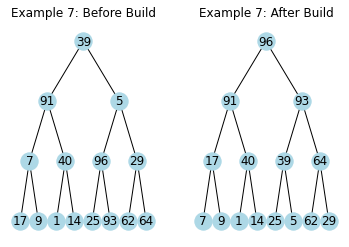

In [10]:
plt.subplot(121)
draw_tree(example7)
plt.title("Example 7: Before Build")

plt.subplot(122)
draw_tree(example7Heaped)
plt.title("Example 7: After Build")

plt.show()

Now that we have both the heapify and max heap building implemented it's time to implement the Heapsort fully

In [11]:
# The Heapsort takes the list to be sorted as it's sole argument
def example_heap_sort(inputList):
    length = len(inputList)
    
    # The build_heap function is called
    example_build_heap(inputList)
    
    # Once the heap has been built, the element at the top of the list is swapped to the position in the list represented by i,
    # then the new head of the heap is compared to see if it is larger than it's children, if not heapify is recursively called,
    # if so, the function returns and the head is swapped, this continues until the whole list has been processed
    for i in range(length - 1, 0, - 1):
        inputList[i], inputList[0] = inputList[0], inputList[i]
        example_heapify(inputList, i, 0)
        
example8 = []

duplicates = True
while duplicates == True:
    example8.clear()
    for i in range(15):
        example8.append(rand.randint(1, 99))
    if len(example8) == len(set(example8)):
        duplicates = False
        
example8

[11, 65, 5, 30, 96, 95, 36, 81, 99, 10, 86, 61, 2, 79, 8]

In [12]:
example8HeapSorted = example8.copy()

example_heap_sort(example8HeapSorted)
example8HeapSorted

[2, 5, 8, 10, 11, 30, 36, 61, 65, 79, 81, 86, 95, 96, 99]

## Python implementation of the Heapsort

In [13]:
# Implementation of the Heapsort
# The functions used here were derived from the heapsort function on this page: https://www.geeksforgeeks.org/heap-sort/
def heap_sort(inputList): # The function for sorting lists is created here, the inputList is the list to sort
    length = len(inputList)
    
    numCompares = 0
    
    #for i in range(length//2 - 1, -1, -1): # The max heap is created
     #   heapify(inputList, length, i)
        
    build_heap(inputList)
    
    for i in range(length-1, 0, -1): # The heap is reverted back to list form
        inputList[i], inputList[0] = inputList[0], inputList[i]
        heapify(inputList, i, 0)

def heapify(inputList, listLength, index): # A subtree is created with the index value being the root
    
    numCompares = 0
    
    root = index
    left = 2 * index + 1
    right = 2 * index + 2
    
     # The root must be larger than either of it's children, or it will be swapped with the larger child
    if left < listLength and inputList[root] < inputList[left]:
         root = left
        
    if right < listLength and inputList[root] < inputList[right]:
        root = right
    
    if root != index: # If the root has been changed and no longer matches, the index, the values stored at the new root and the index are swapped
        inputList[index], inputList[root] = inputList[root], inputList[index] # Values are swapped
        
        numCompares += heapify(inputList, listLength, root) # The tree is recreated with the the new root
        
    return numCompares

def build_heap(inputList):
    length = len(inputList)
    
    for i in range(length // 2 -1, -1, -1):
        heapify(inputList, length, i)

        
testList = []
for i in range(0, 25):
    testList.append(rand.randint(1, 255))
print(testList)

heap_sort(testList)

print(testList)

[57, 47, 50, 211, 230, 80, 132, 147, 203, 238, 15, 57, 68, 253, 106, 111, 140, 146, 66, 198, 64, 246, 174, 41, 54]
[15, 41, 47, 50, 54, 57, 57, 64, 66, 68, 80, 106, 111, 132, 140, 146, 147, 174, 198, 203, 211, 230, 238, 246, 253]
